In [48]:
# sudo pip install scikit-learn
# sudo apt-get install python-sklearn
# sudo apt install python3-sklearn

import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt

In [49]:
from sklearn import datasets
iris = datasets.load_iris()
X_iris, y_iris = iris.data, iris.target
print (X_iris.shape, y_iris.shape)
print (X_iris[0], y_iris[0])
print (iris.target_names)

(150, 4) (150,)
[5.1 3.5 1.4 0.2] 0
['setosa' 'versicolor' 'virginica']


In [50]:
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
# Get dataset with only the first two attributes
X, y = X_iris[:, :2], y_iris
# Split the dataset into a training and a testing set
# Test set will be the 25% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)
print (X_train.shape, y_train.shape)
# Standardize the features
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

(112, 2) (112,)


Text(0,0.5,'Sepal width')

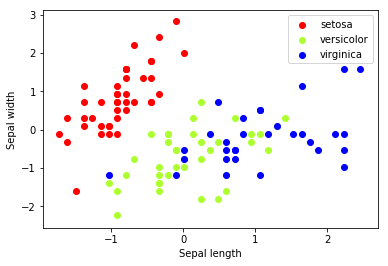

In [57]:
import matplotlib.pyplot as plt
colors = ['red', 'greenyellow', 'blue']
for i in range(len(colors)):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i]
    plt.scatter(xs, ys, c=colors[i])

plt.legend(iris.target_names)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

In [58]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train, y_train)
print (clf.coef_)
print (clf.intercept_)

[[-34.52501222  20.49537864]
 [ -1.49067131 -10.85334472]
 [ 18.75317741  -6.17768505]]
[-18.15627433  -2.68774097   1.349652  ]


/home/bionic/.local/lib/python3.5/site-packages/matplotlib/pyplot.py:3259: MatplotlibDeprecationWarning: The 'hold' keyword argument is deprecated since 2.0.
  mplDeprecation)


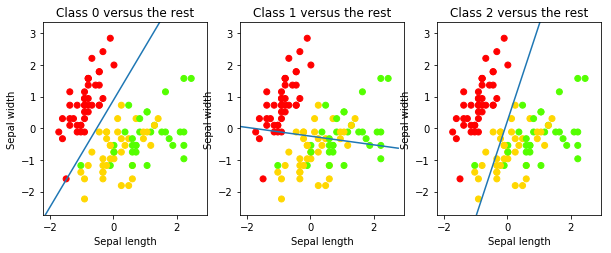

In [59]:
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
xs = np.arange(x_min, x_max, 0.5)
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(10, 6)
for i in [0, 1, 2]:
    axes[i].set_aspect('equal')
    axes[i].set_title('Class '+ str(i) + ' versus the rest')
    axes[i].set_xlabel('Sepal length')
    axes[i].set_ylabel('Sepal width')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    plt.sca(axes[i])
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.prism)
    ys = (-clf.intercept_[i] - xs * clf.coef_[i, 0]) / clf.coef_[i, 1]
    plt.plot(xs, ys, hold=True)

In [60]:
print (clf.predict(scaler.transform([[4.7, 3.1]])))

[0]


In [61]:
print (clf.decision_function(scaler.transform([[4.7, 3.1]])))

[[ 27.26323699  -1.83502928 -22.85330972]]


In [63]:
from sklearn import metrics
y_train_pred = clf.predict(X_train)
print (metrics.accuracy_score(y_train, y_train_pred))

0.7946428571428571


In [64]:
y_pred = clf.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.7105263157894737


In [65]:
print (metrics.classification_report(y_test, y_pred, target_names=iris.target_names))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         8
 versicolor       0.50      0.09      0.15        11
  virginica       0.64      0.95      0.77        19

avg / total       0.68      0.71      0.64        38

